## **Q.1) Delivery_time -> Predict delivery time using sorting time**

Build a simple linear regression model by performing EDA 
and do necessary transformations and select the best model using  Python.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [4]:
time_data=pd.read_csv('delivery_time.csv')
time_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [5]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
time_data.shape    #To check shape of data

(21, 2)

 there are 21 rows and 2 columns in our data

In [8]:
time_data.dtypes   #to check type of data

Delivery Time    float64
Sorting Time       int64
dtype: object

In [9]:
corr_=time_data.corr()   
corr_                        #correlation Coefficient

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

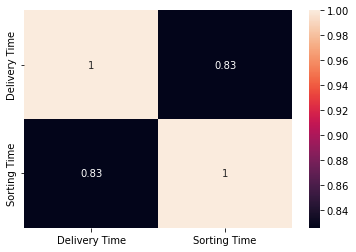

In [10]:
sns.heatmap(corr_,annot=True)

* **There is a positive correlation between Delivery Time and Sorting Time**

In [11]:
#describing our data
time_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


* **The average Delivery Time and Sorting Time  is 16.79 and 6.19 respectively**

* **The minimum delivery time is 8.00 and maximum delivery time is 29.00**

* **The minimum sorting time is 2.00 and maximum sorting time is 10.00**

In [12]:
time_data.skew() , time_data.kurtosis()

(Delivery Time    0.352390
 Sorting Time     0.047115
 dtype: float64,
 Delivery Time    0.317960
 Sorting Time    -1.148455
 dtype: float64)

*  **From Skewness we can say that Delivery data is little bit positive skew and Sorting data is symmetric**

*  **From Kurtosis we can say that there are no Outliers in our data since it is nearly equal to zero.**

In [13]:
#finding null values
time_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

* **There are no null values in our data**

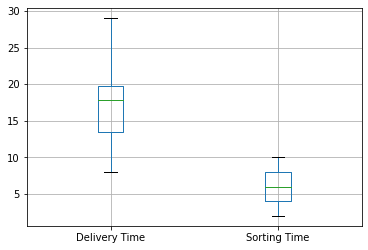

In [15]:
#boxplot
time_data.boxplot()
plt.show()

* **from above box plot  we can say that there are no outliers in our data**

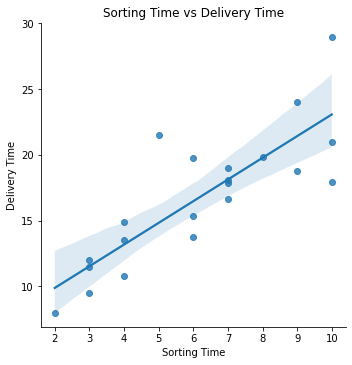

In [17]:
#to check linearity
sns.lmplot(x='Sorting Time',y='Delivery Time',data=time_data)
plt.title("Sorting Time vs Delivery Time")
plt.show()

* **by observing above plot we can say that the linearity condition fails.**

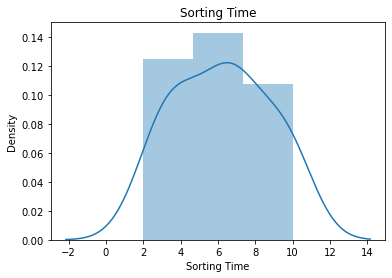

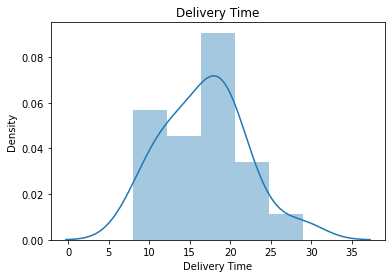

In [20]:
#checking Normality
sns.distplot(a=time_data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

sns.distplot(a=time_data['Delivery Time'])
plt.title('Delivery Time')
plt.show()

* **From above plots we can say that,**
* **for Sorting Time most of the data lie within the group 2 - 10**
* **for Delivery Time most of the data lie within the group 10 - 20**


# Model Building and Model Training

In [22]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [23]:
time_data.columns=['Delivery','Sorting']       
time_data.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [24]:
#fitting model
linear_model=smf.ols("Delivery~Sorting",data=time_data).fit()

In [25]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        14:45:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#parameters
linear_model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [27]:
#t-values and p-values
print(linear_model.tvalues ,'\n', linear_model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [28]:
#R squared values
(linear_model.rsquared,linear_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# By Using Log Transformation

In [29]:
time_data['log_sorting']=np.log(time_data['Sorting'])

time_data.head()

,Delivery,Sorting,log_sorting
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


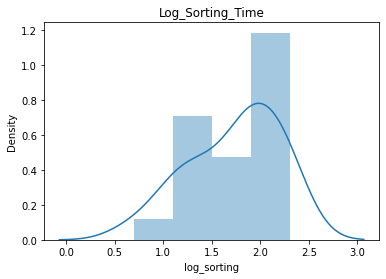

In [30]:
sns.distplot(time_data['log_sorting'])
plt.title("Log_Sorting_Time")
plt.show()

# Model Building by using Log transformation

In [31]:
#fitting model after transforming input variable
linear_model_1=smf.ols("Delivery~log_sorting",data=time_data).fit()

In [32]:
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           2.64e-06
Time:                        14:52:16   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#parameters
linear_model_1.params

Intercept      1.159684
log_sorting    9.043413
dtype: float64

In [34]:
#t-values and p-values
print(linear_model_1.tvalues ,'\n', linear_model_1.pvalues)

Intercept      0.472460
log_sorting    6.586789
dtype: float64 
 Intercept      0.641980
log_sorting    0.000003
dtype: float64


In [35]:
#R squared values
(linear_model_1.rsquared,linear_model_1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

# Model Selection

**After comparing the r-square values for both the models,
we can say that the linear_model_1 (Log Transformation Model) is good for our data because of high value of r-square.**

*  **Now , we can use our best model for further calculation**

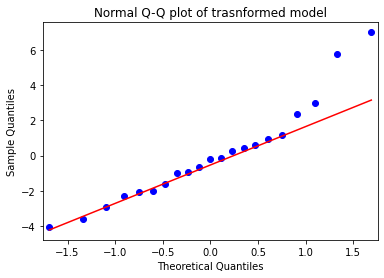

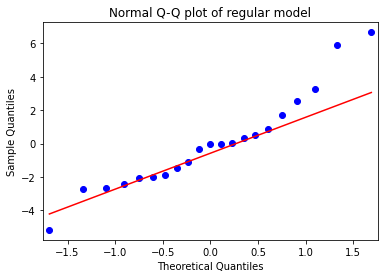

In [37]:
#Normal Q-Q Plot of Residuals for Normality For Transformed Model
sm.qqplot(linear_model_1.resid,line='q')
plt.title('Normal Q-Q plot of trasnformed model')
plt.show()

#Normal Q-Q Plot of Residuals for Normality 
sm.qqplot(linear_model.resid,line='q')
plt.title('Normal Q-Q plot of regular model')
plt.show()

**By observing above two plots of transformed model and regular model,**

**we can say that for transformed model maximum points are lie on straight line,**

**hence our data follows normality condition.**

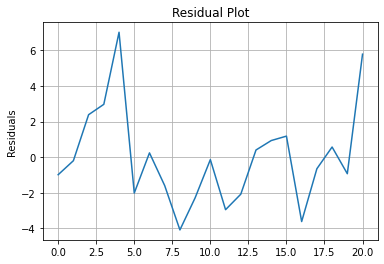

In [38]:
#Residual Plot of transformed  model
plt.plot(linear_model_1.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [39]:
pred_y=linear_model_1.fittedvalues    #predicted values
pred_y.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

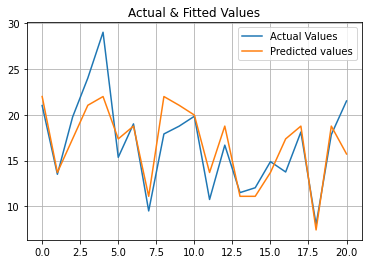

In [40]:
#plot for actual and fitted  values
plt.plot(time_data["Delivery"],label='Actual Values')
plt.plot(pred_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

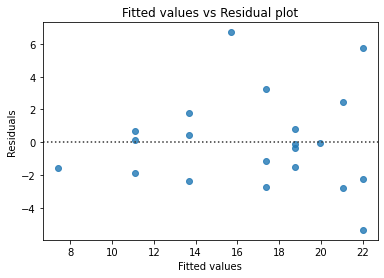

In [41]:
#Residual Vs Fitted Values Plot
sns.residplot(x=pred_y,y=linear_model.resid)
plt.title('Fitted values vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

**This plot looks good in that the variance is roughly the same all the way across and
there are no worrisome patterns.there seems to be no difficulties with the model.**